### Question 2

In [58]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


dat = make_blobs(n_samples=1000, n_features=16, random_state=1)

In [59]:
#Covariance Matrix
sc = StandardScaler()
std_dat = sc.fit_transform(dat[0])
cov_mat = np.cov(std_dat.T, bias=0)

#Eigenvalues, Eigenvectors
e_val, e_vec = np.linalg.eig(cov_mat)

#Variance of Projected Data
#Inspiration from https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained to calculate total variance
w1 = e_vec[:, :1]
pc1 = np.dot(np.array(std_dat),w1)
tot_var = np.trace(cov_mat)
pc1_var = np.var(pc1)
explained = pc1_var / tot_var
explained

0.5531515741739184

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(std_dat)
pca.explained_variance_ratio_[0]

0.5537052794533712

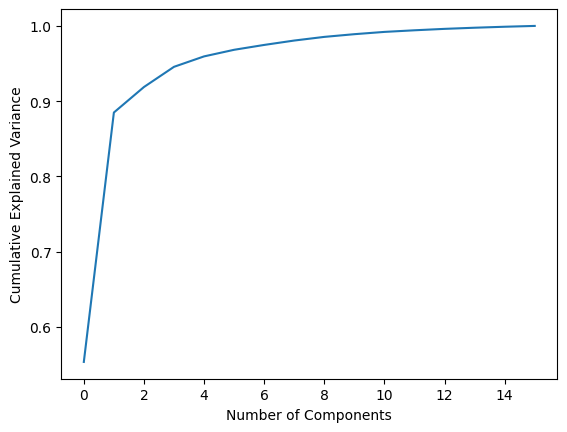

In [61]:
# Inspiration taken from in class exercise
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

As seen from plot above, the best number of components is 2, namely PC0 and PC1. This is because the cumulative explained variance does not increase substantially after PC1

### Question 3

In [62]:
import pandas as pd

names = ['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',]
dat = pd.read_csv("wdbc.data", header=0, names = names)
dat.describe().drop(columns= 'id')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\henry\AppData\Local\Temp\ipykernel_14232\2892199248.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= dat.drop(columns="id").corr()


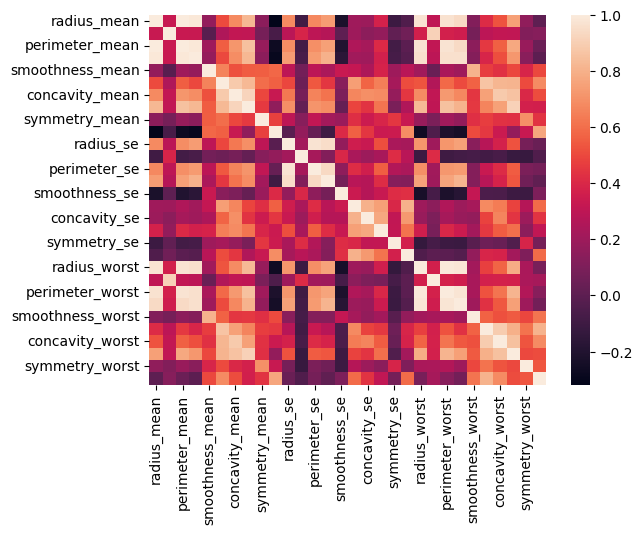

In [63]:
import seaborn as sns

# Inspiration from https://stackoverflow.com/questions/43507756/python-seaborn-how-to-replicate-corrplot
corr= dat.drop(columns="id").corr()
sns.heatmap(corr, fmt='.2f')
plt.show()

In [64]:
# sns.pairplot(dat.drop(columns='id'))

In [66]:
dat['diagnosis_n'] = dat['diagnosis'].replace("M", 1)
dat['diagnosis_n'] = dat['diagnosis_n'].replace("B", 0)

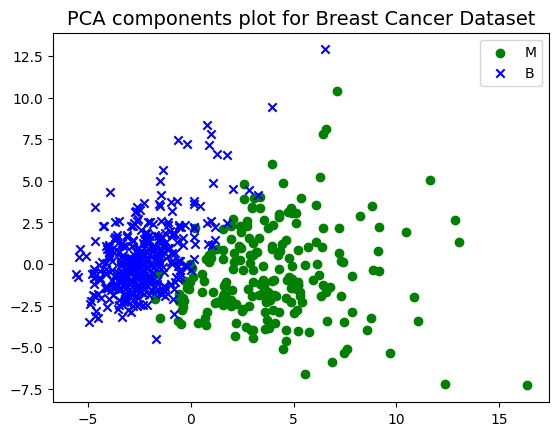

In [75]:
# To visualize, we can only choose a max of 3 components
# PCA
dat2 = dat.drop(columns=["id", "diagnosis"])
sc = StandardScaler()
std_dat = sc.fit_transform(dat2)
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(std_dat)

plt.scatter(pca_fit[dat['diagnosis'] == "M",0], pca_fit[dat['diagnosis'] == "M",1], color='green', marker='o', label='M')
plt.scatter(pca_fit[dat['diagnosis'] == "B",0], pca_fit[dat['diagnosis'] == "B",1], color='blue', marker='x', label='B')
plt.title("PCA components plot for Breast Cancer Dataset", fontsize=14)
plt.legend()
plt.show()

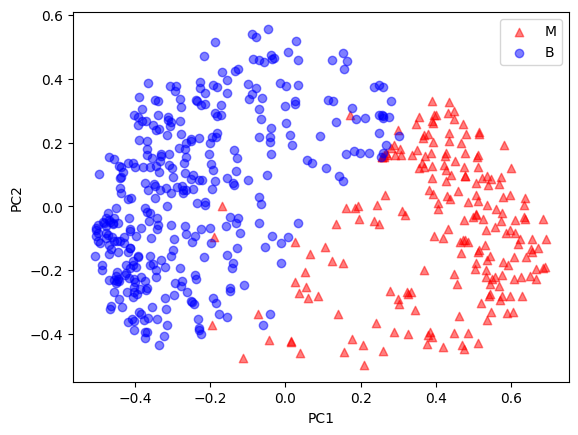

In [79]:
# KPCA
from sklearn.decomposition import KernelPCA

dat2 = dat.drop(columns=["id", "diagnosis"])
sc = StandardScaler()
std_dat = sc.fit_transform(dat2)

kpca = KernelPCA(n_components=3, kernel='rbf')
X_kpca = kpca.fit_transform(std_dat)
plt.scatter(X_kpca[dat['diagnosis'] == "M",0], X_kpca[dat['diagnosis'] == "M",1], color='red', marker='^', alpha=0.5, label = "M")
plt.scatter(X_kpca[dat['diagnosis'] == "B",0], X_kpca[dat['diagnosis'] == "B",1], color='blue', marker='o', alpha=0.5, label = "B")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

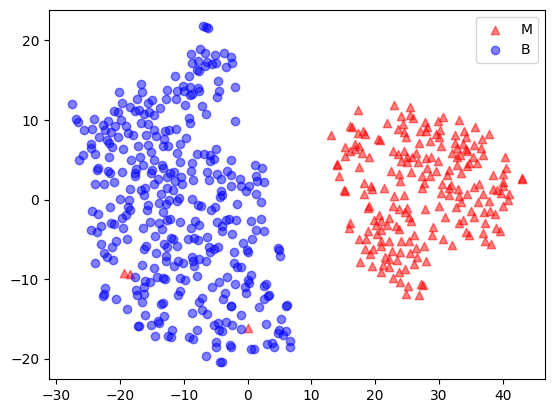

In [80]:
# t-SNE
# Using 2 dimensions for visualizaiton purposes
# Perplexity left as default (30)
from sklearn.manifold import TSNE

dat2 = dat.drop(columns=["id", "diagnosis"])
sc = StandardScaler()
std_dat = sc.fit_transform(dat2)
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(std_dat)

plt.scatter(X_tsne[dat['diagnosis'] == "M",0], X_tsne[dat['diagnosis'] == "M",1], color='red', marker='^', alpha=0.5, label = "M")
plt.scatter(X_tsne[dat['diagnosis'] == "B",0], X_tsne[dat['diagnosis'] == "B",1], color='blue', marker='o', alpha=0.5, label = "B")
plt.legend()
plt.show()

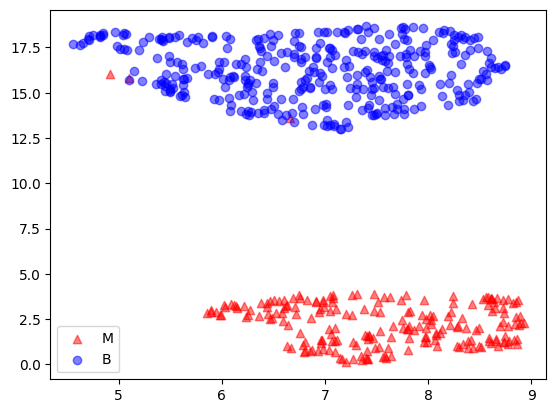

In [85]:
# U-MAP
# Inspiration taken from in class exercise
from umap import UMAP

dat2 = dat.drop(columns=["id", "diagnosis"])
sc = StandardScaler()
std_dat = sc.fit_transform(dat2)

umap_2d = UMAP(n_components=2, init='random', random_state=1)
proj_2d = umap_2d.fit_transform(std_dat)

plt.scatter(proj_2d[dat['diagnosis'] == "M",0], proj_2d[dat['diagnosis'] == "M",1], color='red', marker='^', alpha=0.5, label = "M")
plt.scatter(proj_2d[dat['diagnosis'] == "B",0], proj_2d[dat['diagnosis'] == "B",1], color='blue', marker='o', alpha=0.5, label = "B")
plt.legend()
plt.show()

As seen from the above plots, all methods perform reasonably well as dimensonality reduction methods. However, after reducing dimensions using PCA, the subsequent dataset has significantly less separation between the classes compared to the other methods. Thus, PCA would not be a good method to use to reduce dimensions and prepare the dataset for subsequent classification. T-SNE and U-MAP perform similarly and are both very good at creating class separation for subsequent clustering or classification.